# Teste Cognitivo.AI

Olá ! Obrigada pelo interesse em fazer parte da rede de experts da Cognitivo.ai! Esse é um
teste com o objetivo de conhecer um pouco mais sobre a sua forma de trabalhar com
problemas que envolvem engenharia de dados.

## O problema

O presente problema se refere aos dados de vinhos portugueses "Vinho Verde", que possuem
variantes de vinho branco e tinto. Devido a questões de privacidade, apenas variáveis
físico-químicas (input) e sensoriais (output) estão disponíveis (por exemplo, não há dados
sobre tipo de uva, marca do vinho, preço de venda, etc).

## Objetivo

Criar um modelo para estimar a qualidade do vinho.

## Informação sobre os atributos

Variáveis input (baseado em testes físico-químicos):
1. Tipo
2. Acidez fixa
3. Volatilidade da acidez
4. Ácido cítrico
5. Açúcar residual
6. Cloretos
7. Dióxido de enxofre livre
8. Dióxido de enxofre total
9. Densidade
10. pH
11. Sulfatos
12. Álcool

Variável output (baseado em dado sensorial):
13. Qualidade (score entre 0 and 10)

## Resolução

1. Faça uma análise exploratória para avaliar a consistência dos dados e identificar
possíveis variáveis que impactam na qualidade do vinho.


2. Para a realização deste teste você pode utilizar o software de sua preferência (Python
ou R), só pedimos que compartilhe conosco o código fonte (utilizando um repositório
git). Além disso, inclua um arquivo README.md onde você deve cobrir as respostas
para os 5 pontos abaixo:

> a. Como foi a definição da sua estratégia de modelagem?

> b. Como foi definida a função de custo utilizada?

> c. Qual foi o critério utilizado na seleção do modelo final?

> d. Qual foi o critério utilizado para validação do modelo? Por que escolheu utilizar
este método?

> e. Quais evidências você possui de que seu modelo é suficientemente bom?

## Descrição dos dados

https://drive.google.com/open?id=1-oG5-kBt9xQ3Li4PEexpiA9_7RZhRM1f

------------------
------------------
------------------

# Metodologia aplicada

Como foi postulado na resolução esperada do teste, devemos fazer uma EDA dos dados presentes no arquivo `winequality.csv`, que descrevem diversas características físico-químicas de vinhos verdes. Em seguida de acordo com o objetivo e as questões propostas na segunda parte da resolução, devemos criar um modelo para estimar a qualidade do vinho, mais especificamente, a variável de output.

Para completar estas etapas, será realizado, na seguinte ordem:

1. [Importação dos dados](#part1)
1. [Separação de masssa de dados em treino e teste](#part2)
1. [Limpeza e manipulação dos dados para consumo](#part3)
1. [Análise exploratória](#part4)
1. [Modelagem preditiva](#part5)
1. [Validação do modelo com massa de teste](#part6)

Ao final dessas etapas, teremos a capacidade de corresponder as missões deste teste.

<a id="part1"></a>
# Importação dos dados

Nessa etapa iremos consumir o arquivo disponibilizado para a realização do teste, `winequality.csv`. Mas, antes disso, iremos carregar os recursos utilizados no decorrer deste notebook.

### Carregando bibliotecas e configurações utilizadas

In [371]:
# análise de dados e manipulação
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

from IPython.display import display, HTML
from scipy import stats
from sklearn.model_selection import train_test_split

CSS = """div.output_area img {max-width:None !important;max-height: None !important";}"""
display(HTML('<style>{}</style>'.format(CSS)))
pd.set_option("display.max_rows", 10)

# visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(12,12)})

# algoritmos de aprendizado de máquina
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.kernel_ridge import KernelRidge

# ignorar avisos
import warnings
warnings.filterwarnings('ignore')

### Carregando dados

In [365]:
wine_raw_data = pd.read_csv('./input/winequality.csv', delimiter=';')
wine_raw_data.sample(20)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3250,White,6.7,0.13,0.45,4.20,0.043,52.0,131.0,0.99162,3.06,0.54,11.3,6
2213,White,7.4,0.17,0.29,1.40,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6
2393,White,6.4,0.17,0.34,1.50,0.093,43.0,136.0,0.99380,3.25,0.49,9.6,6
5332,Red,10.4,0.41,0.55,3.20,0.076,22.0,54.0,0.99960,3.15,0.89,9.9,6
1034,White,7.9,0.64,0.46,10.60,0.244,33.0,227.0,0.99830,2.87,0.74,9.1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4698,White,7.0,0.27,0.74,1.30,0.173,34.0,121.0,0.99334,3.04,0.46,9.2,6
1198,White,7.1,0.26,0.32,14.45,0.074,29.0,107.0,0.99800,2.96,0.42,9.2,6
851,White,8.2,0.38,0.49,13.60,0.042,58.0,166.0,0.99855,3.10,0.54,9.4,5
3678,White,7.2,0.23,0.25,18.80,0.085,19.0,111.0,100.04400,3.10,0.51,8.7,5


In [219]:
wine_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null object
quality                 6497 non-null int64
dtypes: float64(10), int64(1), object(2)
memory usage: 659.9+ KB


Podemos perceber que não temos dados ausentes em nenhuma das colunas de variáveis. Também podemos identificar que a variável `type` é categórica, e possui os seguintes valores:

In [17]:
", ".join(wine_raw_data.type.unique())

'White, Red'

Quase todas as outras variáveis aparentam ter valores continuos, com exceção da variável output `quality` que assume valores inteiros. A variável `alcohol` que em primeira instância foi declarada como do tipo `object`, apesar de também aparentar ser também do tipo `float64`. Vamos tentar identificar se existe algum linha em que o valor não pode ser convertido para `float`.

In [366]:
alcohol_not_float_indexes = []

for index, alcohol_value in enumerate(wine_raw_data.alcohol):
    try:
        float(alcohol_value)
    except ValueError:
        alcohol_not_float_indexes.append(index)
        
alcohol_not_float_rows = wine_raw_data.iloc[alcohol_not_float_indexes,:]
alcohol_not_float_rows

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4315,White,6.7,0.410,0.24,5.4,0.035,33.0,115.0,0.99010,3.12,0.44,128.933.333.333.333,7
4319,White,6.7,0.410,0.24,5.4,0.035,33.0,115.0,0.99010,3.12,0.44,128.933.333.333.333,7
4323,White,8.4,0.270,0.30,2.2,0.037,36.0,129.0,0.99085,2.89,0.30,114.666.666.666.667,6
4341,White,7.4,0.270,0.52,15.7,0.054,36.0,139.0,0.99788,3.04,0.62,100.333.333.333.333,6
4353,White,7.4,0.160,0.30,1.4,0.064,34.0,166.0,0.99136,3.11,0.42,114.333.333.333.333,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,Red,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,100.333.333.333.333,6
6337,Red,7.3,0.670,0.02,2.2,0.072,31.0,92.0,0.99566,3.32,0.68,110.666.666.666.667,6
6339,Red,7.4,0.785,0.19,5.2,0.094,19.0,98.0,0.99713,3.16,0.52,956.666.666.666.667,6
6373,Red,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,135.666.666.666.667,7


Podemos notar que os valores da variável `alcohol`, a partir do quarto dígito, apresentam números de dízimas periódicas. Muito provavelmente, não precisamos eliminar essas entradas, e devemos somente converte-las para valores condizentes com os outros valores. Já que vamos precisar analisar os outros valores diminuir erros de indução, iremos realizar esta operação na etapa de [Limpeza e manipulação dos dados para consumo](#part3), depois da separação das massas de dados.

<a id="part2"></a>
# Separação de masssa de dados em treino e teste

Para podermos validar nossos modelos ao final da modelagem, iremos destinar uma parte dos dados para a validação.

Vale notar que, antes de fazer qualquer inferência sobre os dados, devemos separa-los em duas massas de dados distintas, uma especificamente para análise e modelagem, e a outra para validação do modelo. Nosso objetivo com essa abordagem, mesmo antes de começar qualquer análise exploratória, é evitar o viés que podemos introduzir no nosso modelo ao utilizar dados de validação, visto que mesmo a exploração dos dados irá influenciar a modelagem dos dados.

In [152]:
wine_raw_data_train, wine_raw_data_test = train_test_split(wine_raw_data, test_size=0.2, random_state=32)
wine_raw_data_train.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4276,White,5.2,0.31,0.20,2.40,0.027,27.0,117.0,0.98886,3.56,0.45,13,7
4668,White,6.0,0.17,0.33,6.00,0.036,30.0,111.0,0.99362,3.32,0.58,10.15,7
4648,White,6.7,0.61,0.21,1.65,0.117,40.0,240.0,0.99380,3.11,0.57,9.3,5
1891,White,7.6,0.33,0.41,13.70,0.045,44.0,197.0,0.99890,3.18,0.64,9.1,5
2413,White,7.1,0.21,0.28,2.70,0.034,23.0,111.0,0.99405,3.35,0.64,10.2,4


A partir de agora, não iremos utilizar o objeto `wine_raw_data_test`, até que seja necessário realizar a validação dos nossos modelos.

<a id="part3"></a>
# Limpeza e manipulação dos dados para consumo

Nesta etapa iremos limpar e manipular os dados para obter uma massa de dados mais apropriada para a exploração e modelagem. Através dos passos anteriores podemos já destacar os seguintes pontos de atenção:

1. A variável `type` é do tipo categórica, assumindo dois valores 'White' e 'Red'.
1. A variável `alcohol` está encodada como do tipo `object` apesar de conter valores que podem ser equiparáveis ao tipo `float`.

Vamos primeiramente entender os valores contidos na variável `alcohol`:

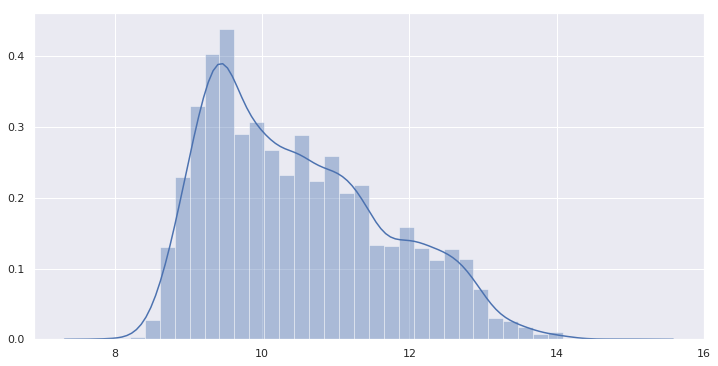

In [217]:
def get_alcohol_not_float_dataset_indexes(dataset):
    alcohol_not_float_dataset_match = dataset.loc[alcohol_not_float_indexes, :].alcohol.notnull()
    alcohol_not_float_dataset_indexes = (
        alcohol_not_float_dataset_match.index[alcohol_not_float_dataset_match].tolist()
    )
    return alcohol_not_float_dataset_indexes

alcohol_not_float_train_indexes = get_alcohol_not_float_dataset_indexes(wine_raw_data_train)
sns.distplot(np.array(wine_raw_data_train.drop(alcohol_not_float_train_indexes).alcohol, dtype='float64'));

Os valores se encontram entre 8 e 14, portanto vamos assumir que os valores da variável `alcohol` que se encontram como `string` de dízima podem ser aproximados para valores dentro desta faixa. É notável que podemos assumir, por exemplo, que o valor `128.933.333.333.333` pode ser substituído por 12.89, e neste caso os dois primeiros dígitos compõem a parte inteira do número, entretanto o valor `923.333.333.333.333` deve ser aproximado para 9.23, e neste caso somente o primeiro dígito compõe a parte inteira do número. Devemos levar esse comportamento em consideração.

Por conveniência, estamos compactando as regras de limpeza e manipulação dos dados em funções, com o intuito de modularizar essa etapa, já que provavelmente vamos precisar realizar as mesmas transformações nos dados de validação.

In [258]:
def alcohol_to_float(alcohol_not_float_values):
    alcohol_float = np.array(alcohol_not_float_values.str.replace('.', ''), dtype='float64')/(10e+12)
    alcohol_float[alcohol_float > 20] = alcohol_float[alcohol_float > 20]/10
    return alcohol_float

Agora podemos unir estas regras em uma função de conversão dos dados:

In [334]:
def convert_data(dataset):
# Convertendo a variável type para facilitar análises e modelagens
    dataset = dataset.replace(['Red', 'White'], [0, 1])
    dataset.type = pd.to_numeric(dataset.type)

# Corrigindo a variável alcohol
    alcohol_not_float_dataset_indexes = get_alcohol_not_float_dataset_indexes(dataset)
    alcohol_not_float_dataset_values = dataset.loc[alcohol_not_float_dataset_indexes, 'alcohol']
    alcohol_float_dataset_values = alcohol_to_float(alcohol_not_float_dataset_values)
    dataset.loc[alcohol_not_float_dataset_indexes, 'alcohol'] = (
        np.array(alcohol_float_dataset_values, dtype='str')
    )
    dataset.alcohol = pd.to_numeric(dataset.alcohol) 
    
    return dataset

wine_train_data = convert_data(wine_raw_data_train)
wine_train_data.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 4276 to 2775
Data columns (total 13 columns):
type                    5197 non-null int64
fixed acidity           5197 non-null float64
volatile acidity        5197 non-null float64
citric acid             5197 non-null float64
residual sugar          5197 non-null float64
chlorides               5197 non-null float64
free sulfur dioxide     5197 non-null float64
total sulfur dioxide    5197 non-null float64
density                 5197 non-null float64
pH                      5197 non-null float64
sulphates               5197 non-null float64
alcohol                 5197 non-null float64
quality                 5197 non-null int64
dtypes: float64(11), int64(2)
memory usage: 728.4 KB


Todas as variáveis independentes do dataset agora são valores numéricos, o que facilita a modelagem e uso de algoritmos de regressão / predição.

### Remoção de outliers

Vamos investigar os valores presentes para entender se existem alguma outra discrepância entre os valores:

In [335]:
wine_train_data.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,0.751587,7.217991,0.339280,0.316279,5.385107,0.055859,30.501251,115.777949,1.714894,3.219251,0.532779,10.493631,5.817779
std,0.432134,1.306442,0.162639,0.143620,4.740546,0.033917,17.894354,56.711031,7.707597,0.161056,0.148984,1.189214,0.872825
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987130,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,2.900000,0.047000,29.000000,118.000000,0.994880,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.000000,0.065000,41.000000,156.000000,0.996920,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.330000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,14.900000,9.000000


Algumas perguntas podem ser elencadas sobre os dados presentes, por exemplo a possibilidade de alguns valores serem inválidos. Podemos observar, por exemplo, que o valor máximo de `density`é 103.898, o que parece ser irreal quando observamos que deve se tratar de uma medida de g/mL.

In [340]:
wine_train_high_density_data = (
    wine_train_data.iloc[np.where(wine_raw_data_train_cleaned.density > 2)[0], :]
)
display(wine_train_high_density_data.sample(5))
print('Count high density rows:', wine_train_high_density_data.count().density)
print('min density value:', wine_train_high_density_data.density.min()) 
print('max density value:', wine_train_high_density_data.density.max())

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2115,1,6.5,0.22,0.25,17.10,0.050,44.0,138.0,10.001,3.30,0.37,8.8,5
5386,0,11.6,0.32,0.55,2.80,0.081,35.0,67.0,10.002,3.32,0.92,10.8,7
5141,0,15.0,0.21,0.44,2.20,0.075,10.0,24.0,100.005,3.07,0.84,9.2,7
2396,1,8.4,0.30,0.25,17.75,0.047,25.0,218.0,100.016,2.98,0.66,9.1,5
5430,0,11.9,0.38,0.49,2.70,0.098,12.0,42.0,10.004,3.16,0.61,10.3,5


Count high density rows: 105
min density value: 10.001
max density value: 103.898


Não é trivial como podemos aproveitar estes valores, portanto iremos eliminar essas linhas utilizando a seguinte regra: 

In [341]:
def remove_high_density_rows(dataset):
    return dataset[dataset.density < 10]

Outros valores também podem ser irreais ou outliers. Por falta de contexto, iremos fazer uma simples remoção de outliers, removendo valores que se encontram além do intervalo `(mean - 4 std, mean + 4 std)`, utilizando, portanto, um z-score de 4 como threshold:

In [346]:
def remove_high_absolute_z_score_rows(dataset):
    return dataset[(np.abs(stats.zscore(dataset)) < 4).all(axis=1)]

Podemos agora unir essas regras em uma função de remoção de outliers e valores irreais: 

In [347]:
def remove_outliers(dataset):
    dataset = remove_high_density_rows(dataset)
    dataset = remove_high_absolute_z_score_rows(dataset)
    return dataset

wine_train_cleaned_data = remove_outliers(wine_train_data)
wine_train_cleaned_data.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000
mean,0.767944,7.126714,0.333910,0.310665,5.294577,0.052988,30.429234,116.210585,0.994495,3.221335,0.524764,10.518810,5.833065
std,0.422187,1.137020,0.156169,0.136135,4.533105,0.023365,16.868103,55.135193,0.002798,0.159289,0.133199,1.187365,0.868180
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987130,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,80.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,1.000000,6.900000,0.290000,0.300000,2.900000,0.047000,29.000000,119.000000,0.994720,3.210000,0.500000,10.300000,6.000000
75%,1.000000,7.600000,0.400000,0.380000,7.962500,0.062000,41.000000,155.000000,0.996760,3.330000,0.600000,11.300000,6.000000
max,1.000000,12.000000,0.980000,0.880000,22.600000,0.190000,101.000000,303.000000,1.001000,3.850000,1.120000,14.200000,9.000000


Através das operações de higienização, abandonamos algumas linhas. É importante notar que, talvez, alguns desses valores poderiam ser aproveitados após inspeção mais rígida, o que provavelmente iria demandar pesquisas mais extensas. Reduzimos nosso dataset de treino:

In [353]:
print(np.round(wine_train_cleaned_data.quality.count()/wine_train_data.quality.count(), 4)*100, '%',
      'da quantidade de linhas original.')

95.44 % da quantidade de linhas original.


<a id="part4"></a>
# Análise exploratória

Agora que fizemos uma limpeza inicial dos nossos dados de treino, podemos explorar-los com intuito de ampliar nossa intuição e conhecimento do dataset.

É notável que através da limpeza dos dados nós **já fizemos um exploração inicial dos dados**, entretanto neste momento iremos buscar mais correlações que possam existir inter e intra variáveis.

Como passo inicial podemos plotar a correlação entre todas as variáveis, de duas em duas, e tentar observar padrões que podem ser explorados de maneira mais próxima:

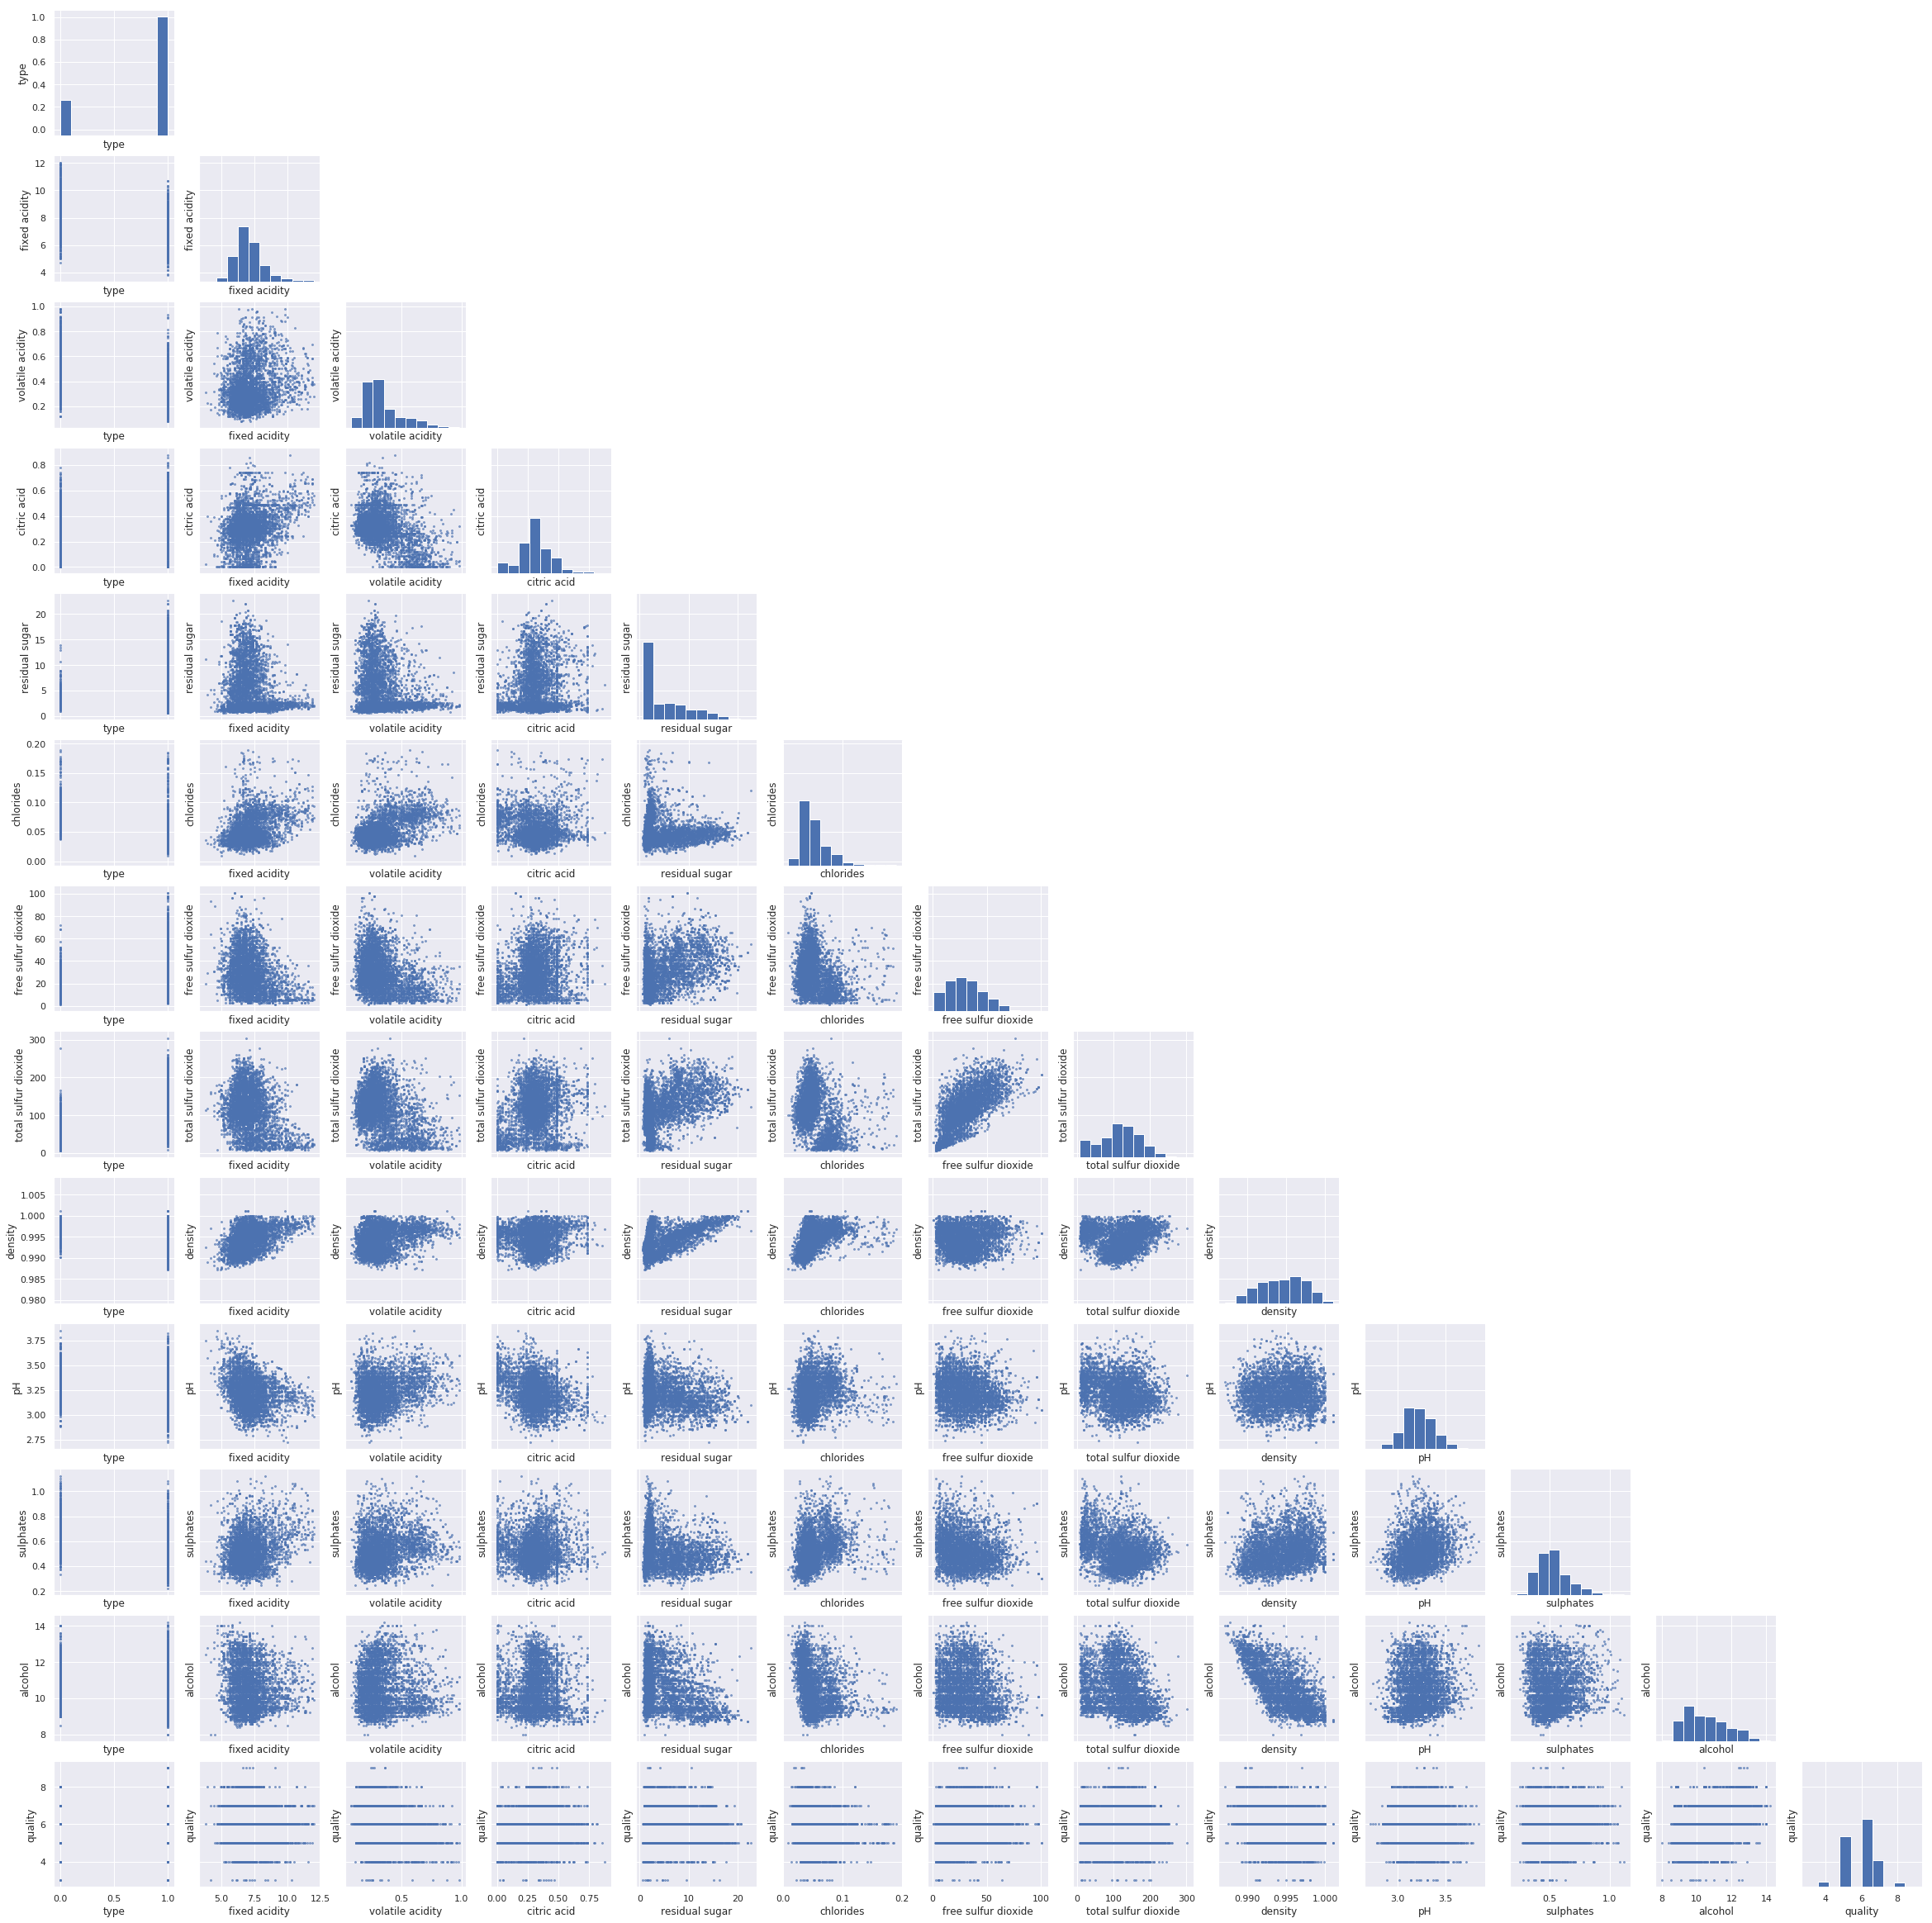

In [387]:
wine_train_data_pairplot = sns.PairGrid(wine_train_cleaned_data)
wine_train_data_pairplot.map_diag(plt.hist)
wine_train_data_pairplot.map_offdiag(plt.scatter, alpha=0.6, s=4)
xlabels,ylabels = [],[]

for ax in wine_train_data_pairplot.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in wine_train_data_pairplot.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

# print(xlabels, ylabels)
    
for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        wine_train_data_pairplot.axes[j,i].xaxis.set_label_text(xlabels[i])
        wine_train_data_pairplot.axes[j,i].yaxis.set_label_text(ylabels[j])

for i, j in zip(*np.triu_indices_from(wine_train_data_pairplot.axes, 1)):
    wine_train_data_pairplot.axes[i, j].set_visible(False)
        
plt.show()